# I. Linear least squares approximation

In [263]:
pip install matplotlib

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



In [264]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [265]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [266]:
# write a function to generate design matrix
def design_matrix(x, y, m):
    # get the length of the vectors
    length = len(x)

    # create numpy arrays
    A = np.zeros((length, m+1))

    for i in range(m+1):
        for j in range(length):
            A[j, i] = x[j] ** i
    return A


In [267]:
# solve normal equations
def solve_normal(x, y, m):
    # given m, we can compute A and A transpose
    A = design_matrix(x, y, m)
    # beta_hat = (A_T dot A).transpose A_T y
    ans = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)
    return ans

In [268]:
# calculate the best fitting coefficient for different number of basis functions
for num_of_basis_minus_one in range(len(x)):
    if num_of_basis_minus_one == 0:
        print("The best fitting coefficient for 1 basis function:")
    else:
        print("The best fitting coefficients for {} basis function(s):".format(num_of_basis_minus_one+1))
    print(solve_normal(x, y, num_of_basis_minus_one))

The best fitting coefficient for 1 basis function:
[0.79066667]
The best fitting coefficients for 2 basis function(s):
[-0.6479869   1.46502399]
The best fitting coefficients for 3 basis function(s):
[-1.25772058 -0.65313865  1.0667959 ]
The best fitting coefficients for 4 basis function(s):
[ 0.49483598 -0.26983377 -2.01973166  1.01540301]
The best fitting coefficients for 5 basis function(s):
[ 0.51184244 -0.33857023 -2.05689291  1.08931365 -0.01872316]
The best fitting coefficients for 6 basis function(s):
[ 0.53158296 -0.24431123 -2.15174437  0.99954653  0.07265921 -0.01835276]
The best fitting coefficients for 7 basis function(s):
[ 0.58335489 -0.21341539 -2.47667914  1.08743364  0.3156542  -0.17478186
  0.02574425]
The best fitting coefficients for 8 basis function(s):
[ 0.5744677  -0.13006497 -2.3829579   0.80842609  0.3196533   0.0116892
 -0.06899496  0.01366621]
The best fitting coefficients for 9 basis function(s):
[ 0.53749244 -0.37095534 -2.06051934  1.53912235 -0.54617266 

In [269]:
# generate our predictions for y
def predict(n):
    coef = np.asmatrix(solve_normal(x, y, num_of_basis_minus_one))
    # print("coefficient matrix: ", coef)
    # print("design matrix: ", design_matrix(x, y, num_of_basis_minus_one))
    prediction = np.matmul(design_matrix(x, y, num_of_basis_minus_one), coef.transpose())
    return (prediction.transpose())


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [270]:
# compute our predictions for y and calculate the error (MSE)
# plot for 1-15 basis functions
index = []
errors = []
for num_of_basis_minus_one in range(15):
    if num_of_basis_minus_one == 0:
        print("Predictions for y with 1 basis function:")
    else:
        print("Predictions for y with {} basis function(s):".format(num_of_basis_minus_one+1))
    
    # predict
    prediction = predict(num_of_basis_minus_one)

    print(prediction)

    # calculate error
    error = (np.square(prediction - y).sum(axis = None) / (15 - num_of_basis_minus_one))

    print("error: ", error) 

    index.append(num_of_basis_minus_one)
    errors.append(error)
print(errors)

Predictions for y with 1 basis function:
[[0.79066667 0.79066667 0.79066667 0.79066667 0.79066667 0.79066667
  0.79066667 0.79066667 0.79066667 0.79066667 0.79066667 0.79066667
  0.79066667 0.79066667 0.79066667]]
error:  7.495379555555556
Predictions for y with 2 basis function(s):
[[-2.11301089 -1.67350369 -1.27794721 -0.85309026 -0.85309026 -0.01802658
   0.39218014  0.8170371   1.24189406  1.65210078  2.07695773  2.48716445
   2.91202141  3.32222813  3.74708509]]
error:  4.450215866706205
Predictions for y with 3 basis function(s):
[[ 0.46221397 -0.27779353 -0.7796204  -1.14537197 -1.14537197 -1.34131963
  -1.1836772  -0.84406332 -0.32501438  0.34639696  1.21812863  2.23006121
   3.45447561  4.80692945  6.38402657]]
error:  2.453426997579178
Predictions for y with 4 basis function(s):
[[-2.27046492 -0.65423213  0.15668447  0.4902397   0.4902397   0.08609073
  -0.35146881 -0.77932643 -1.03453056 -0.97773859 -0.46054631  0.61912743
   2.48274984  5.13954481  8.92363107]]
error:  0.01

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

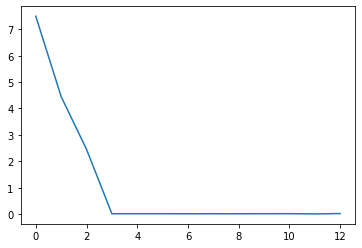

In [271]:
# plot errors for 1-13 basis functions
plt.plot(index[:13], errors[:13])

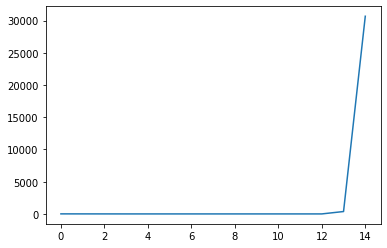

In [272]:
# plot errors for 1-15 basis functions
plt.plot(index, errors)

The optimal m is 13 from the calculation, which is clear from the plot. <br>
Although 4 basis functions could already generate good-enough predictions for y. <br>
Also, we can find that 14 and 15 basis function will cause the error to explode (overfitting!).

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, without ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [273]:
# optimal m: 0
q, r = np.linalg.qr(design_matrix(x, y, 2))
# print(q)
# rint(r)
# print(np.dot(np.transpose(q), y))
f = np.dot(np.transpose(q), y)
# print(f)
r1 = np.dot(np.transpose(q), design_matrix(x, y, 2))
# print(r1)
b = np.dot(np.linalg.inv(r1), f)
print(b) # same as what we did with polynomial splines!:)

np.allclose(b, solve_normal(x, y, 2))


[-1.25772058 -0.65313865  1.0667959 ]


True

We found that the result is exactly the same as what we have got in the first part! Yay!

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [275]:
import math

In [276]:
# this function would get the given mesh ("x"), function to interpolate ("y") and the polynomial of degree "m",
# and then generate interpolants via Largrange interpolation
def interpolate(info, x, y, m):
    prediction = 0
    for k in range(m + 1):
        result = 1
        for j in range(m + 1):
            if (j != k): # multiply the Largrange term if j != k
                result = result * ((info - x[j]) / (x[k] - x[j]))
                # print(result)
        # generate prediction
        prediction += y[k] * result
    return prediction

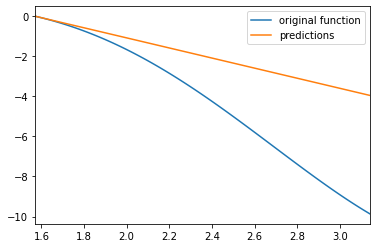

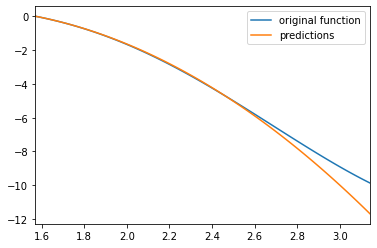

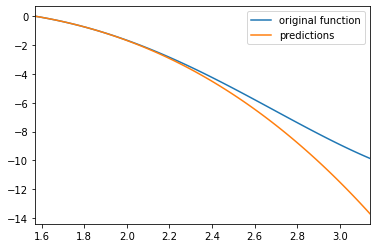

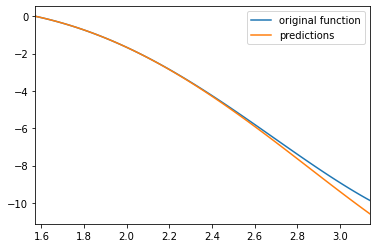

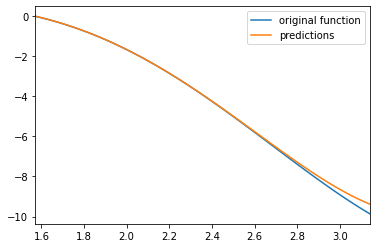

In [277]:
# test
mesh = np.linspace(math.pi / 2, math.pi, 100)
fcn = mesh ** 2 * np.cos(mesh) 

# print("mesh: ", mesh)
# print("fcn: ", fcn)

def test(mesh, fcn, m):
  predictions = []
  for i in mesh:
    predictions.append(interpolate(i, mesh, fcn, m))
  # print("mesh: ", mesh)
  # print("predictions: ", predictions)
  plt.plot(mesh, fcn, label = "original function")
  plt.plot(mesh, predictions, label = "predictions")
  plt.legend()
  plt.xlim(math.pi / 2, math.pi)
  # plt.ylim(-10, 5)
  plt.show()

# plots for m = 1, 2, 3, 4, 5
test(mesh, fcn, 1)
test(mesh, fcn, 2)
test(mesh, fcn, 3)
test(mesh, fcn, 4)
test(mesh, fcn, 5)


### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

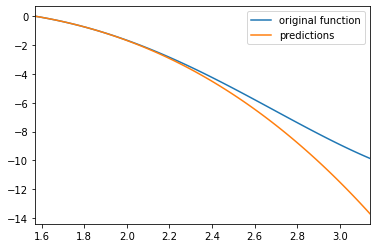

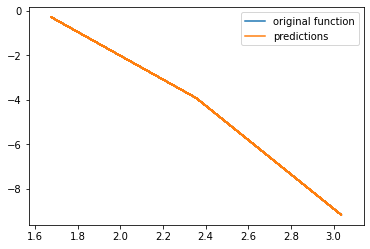

In [278]:
# uniform mesh m = 3
mesh = np.linspace(math.pi / 2, math.pi, 100)
fcn = mesh ** 2 * np.cos(mesh) 
test(mesh, fcn, 3)

# chebyshev node m = 3
mesh2 = []
fcn2 = []
for m in range(100):
    mesh2.append(3 * math.pi/4 + (math.pi / 4) * math.cos(((2 * m + 1) / (2 * 3)) * math.pi))
    fcn2.append(mesh2[m] ** 2 * math.cos(mesh2[m]))
# print(mesh2)
# print(fcn2)  

test(mesh2, fcn2, 3)


As we may observed from the above two graphs, we know that Chebyshev nodes performs better than uniform mesh.